# Overfitting demo

## Create a dataset based on a true sinusoidal relationship
Let's look at a synthetic dataset consisting of 30 points drawn from the sinusoid $y = \sin(4x)$:

In [1]:
import pandas as pd
import math
import random
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Create random values for x in interval [0,1)

In [191]:
random.seed(98103)
n = 30
b = {}
x = np.array([np.random.randn () for i in range(n)])
print(x)


[-1.13027482  0.92709144 -0.99511234 -0.4651923  -0.10382573  0.52812847
 -0.51736124 -0.24018072 -0.54882641 -1.0584972   1.04095866  1.06218588
 -1.4525052  -1.21909889  0.25689966  0.65238726  0.07140878 -1.27572174
  0.90007642 -0.03440285  0.74872192  0.63038625  0.54270082  0.13990433
 -0.28843639 -1.81766376 -1.78800044 -0.10752399 -1.02684656 -1.35646154]


Just other version of above detailed

for i in range(1,n):
    a = np.random.randn()
    #print(a)
    b[i]=(a)
    #x= np.sort(x)
#x = np.array([random.random() for i in range(n)]).sort()
print(b)

Compute y

In [192]:
y = np.array([math.sin(4*i) for i in x])
y

array([ 0.98175985, -0.53691253,  0.74387951, -0.95825163, -0.4034671 ,
        0.85682436, -0.87822964, -0.81960595, -0.81125012,  0.88773256,
       -0.85327925, -0.89442816,  0.45570537,  0.98658104,  0.85606025,
        0.50729555,  0.28176691,  0.92471962, -0.44279456, -0.1371775 ,
        0.14617932,  0.58107395,  0.82533169,  0.53086192, -0.91428755,
       -0.83463498, -0.76356523, -0.41695804,  0.82250053,  0.75610385])

Just detailed of above with dict

d ={}
j = 0

for i in b.values():
    y = math.sin(4*i)
    #print(i,y)
    j += 1
    d[j] = y
    
print(d)

Add random Gaussian noise to y

In [193]:
random.seed(1)
e = np.array([np.random.randn() for i in range(n)])
#print(e)
y = y + e
y

array([ 3.05075949, -0.04414425,  1.01575905, -0.44471282,  0.03917841,
       -0.03823817, -1.73867484, -2.07527938, -0.71274889,  0.16101542,
       -1.19258821, -1.21458923,  1.27015046,  0.92871896,  0.29256291,
        0.39732518, -0.20278581,  2.32916481,  0.60118282,  0.12789412,
        0.52779715,  2.81251912,  0.28604282, -0.75933493, -0.80012413,
        0.13419954, -0.56440398,  0.55650616,  0.92133583,  0.4505479 ])

### Put data into an DataFrame to manipulate later

In [194]:
data = pd.DataFrame({'X1':x,'Y':y})
data

,X1,Y
0,-1.130275,3.050759
1,0.927091,-0.044144
2,-0.995112,1.015759
3,-0.465192,-0.444713
4,-0.103826,0.039178
5,0.528128,-0.038238
6,-0.517361,-1.738675
7,-0.240181,-2.075279
8,-0.548826,-0.712749
9,-1.058497,0.161015


### Create a function to plot the data, since we'll do it many times

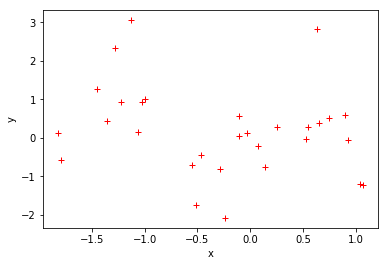

In [195]:
def plot_data(data):    
    plt.plot(data['X1'],data['Y'],'r+')
    # here plotting is done bw x1 vs y and r+ is color name as r->red , and + is symbol 
    # we can change to b_ as blue dash , y* as yellow * 
    plt.xlabel('x')
    plt.ylabel('y')

plot_data(data)

## Define some useful polynomial regression functions

Define a function to create our features for a polynomial regression model of any degree:

In [196]:
def polynomial_features(data, deg):
    data_copy = data.copy()
    for i in range(1,deg):
        data_copy['X'+str(i+1)]=data_copy['X'+str(i)]*data_copy['X1']
    return data_copy

In [197]:
y = data['Y']
x =data.drop('Y',axis =1)
#print(x,y)

Define a function to fit a polynomial linear regression model of degree "deg" to the data in "data":

In [198]:
w = polynomial_features(x,deg=3)
w

,X1,X2,X3
0,-1.130275,1.277521,-1.443950
1,0.927091,0.859499,0.796834
2,-0.995112,0.990249,-0.985409
3,-0.465192,0.216404,-0.100669
4,-0.103826,0.010780,-0.001119
5,0.528128,0.278920,0.147305
6,-0.517361,0.267663,-0.138478
7,-0.240181,0.057687,-0.013855
8,-0.548826,0.301210,-0.165312
9,-1.058497,1.120416,-1.185958


In [199]:
from sklearn.linear_model import LinearRegression
def polynomial_regression(data, deg, out , model ):
    model = model()
    x = polynomial_features(data,deg)
    y = out 
    model.fit(x,y)
    pred_y = model.predict(x)
    return model ,pred_y


In [200]:
li_model = LinearRegression
model,pred_y = polynomial_regression(x ,3 ,y , li_model)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [201]:
model.coef_
print(pred_y)

[ 0.59591789  0.04062551  0.52650095  0.18469536 -0.03501367 -0.17038448
  0.21971124  0.04121856  0.2409601   0.56058223  0.15851657  0.18368271
  0.69837963  0.63410991 -0.16753168 -0.13528339 -0.11428429  0.65484371
  0.01674419 -0.06928613 -0.08989138 -0.14336086 -0.16755865 -0.13807418
  0.07050074  0.65904428  0.6699279  -0.03309363  0.54387719  0.67895914]


In [202]:
res = (y - pred_y)
RSS = sum(res**2)
print( RSS)
print(res)


36.767122844426936
0     2.454842
1    -0.084770
2     0.489258
3    -0.629408
4     0.074192
5     0.132146
6    -1.958386
7    -2.116498
8    -0.953709
9    -0.399567
10   -1.351105
11   -1.398272
12    0.571771
13    0.294609
14    0.460095
15    0.532609
16   -0.088502
17    1.674321
18    0.584439
19    0.197180
20    0.617689
21    2.955880
22    0.453601
23   -0.621261
24   -0.870625
25   -0.524845
26   -1.234332
27    0.589600
28    0.377459
29   -0.228411
Name: Y, dtype: float64


Define function to plot data and predictions made, since we are going to use it many times.

In [227]:
def plot_poly_predictions(data, model):
    plot_data(data)

    # Get the degree of the polynomial
    deg = len(model.coef_)
    
    # Create 200 points in the x axis and compute the predicted value for each point
    x_pred = pd.DataFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))
    
    # plot predictions
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

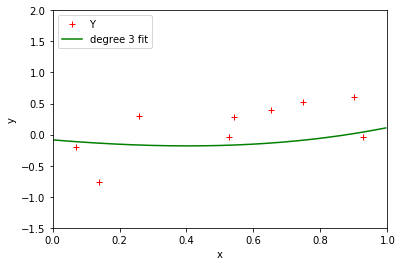

In [229]:
plot_poly_predictions(data , model)

Create a function that prints the polynomial coefficients in a pretty way :)

In [205]:
def print_coefficients(model):    
    # Get the degree of the polynomial
    deg = len(model.coef_)

    # Get learned parameters as a list
    w = list(model.coef_)
    #print('w',w)
    # Numpy has a nifty function to print out polynomials in a pretty way
    # (We'll use it, but it needs the parameters in the reverse order)
    print ('Learned polynomial for degree ' + str(deg) + ':')
    w.reverse()
    print( np.poly1d(w) )

In [206]:
print_coefficients(model)

Learned polynomial for degree 3:
       2
0.233 x + 0.406 x - 0.4412


## Fit a degree-2 polynomial

Fit our degree-2 polynomial to the data generated above:

In [207]:
# degree = 2
li_model = LinearRegression
model_2,pred_2y = polynomial_regression(x ,2 ,y , li_model)
model_2


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Inspect learned parameters

In [208]:
print_coefficients(model_2)

Learned polynomial for degree 2:
 
0.1632 x - 0.2073


Form and plot our predictions along a grid of x values:

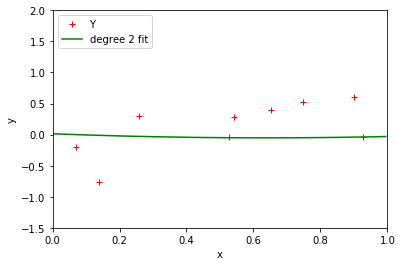

In [230]:
plot_poly_predictions(data,model_2)

## Fit a degree-4 polynomial

Learned polynomial for degree 4:
        3         2
-1.943 x - 2.857 x + 2.438 x + 2.213


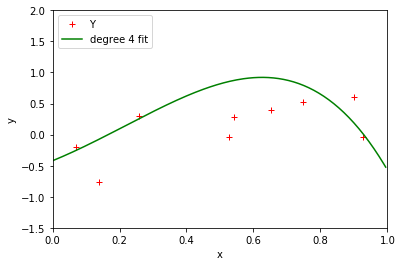

In [231]:
model_4,pred_4y = polynomial_regression(x, 4 , y ,li_model)
print_coefficients(model_4)
plot_poly_predictions(data, model_4)

Learned polynomial for degree 8:
      7         6         5         4       3         2
1.44 x + 1.509 x - 6.273 x - 4.997 x + 6.3 x + 1.225 x - 1.076 x + 1.612


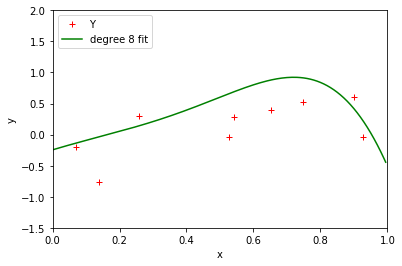

In [211]:
model_8,pred_8y = polynomial_regression(x, 8 , y ,li_model)
print_coefficients(model_8)
plot_poly_predictions(data, x ,model_8)

## Fit a degree-16 polynomial

In [212]:
model_16 , pred_16y = polynomial_regression(x, 16, y, li_model)
print_coefficients(model_16)

Learned polynomial for degree 16:
       15         14         13         12         11         10
31.07 x  + 145.2 x  + 97.28 x  - 444.3 x  - 606.9 x  + 420.3 x 
          9         8         7       6         5         4         3
 + 898.8 x - 45.45 x - 475.9 x - 126 x - 10.76 x + 53.56 x + 84.47 x
         2
 - 5.04 x - 18.08 x + 1.105


### Woah!!!!  Those coefficients are *crazy*!  On the order of 10^6.

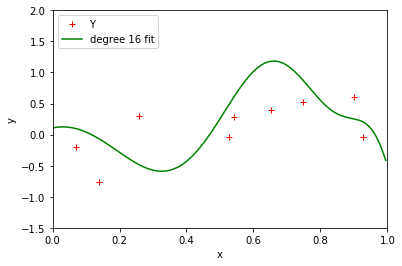

In [232]:
plot_poly_predictions(data, model_16)

### Above: Fit looks pretty wild, too.  Here's a clear example of how overfitting is associated with very large magnitude estimated coefficients.

# 

# 

 # 

 # 

# Ridge Regression

Ridge regression aims to avoid overfitting by adding a cost to the RSS term of standard least squares that depends on the 2-norm of the coefficients $\|w\|$.  The result is penalizing fits with large coefficients.  The strength of this penalty, and thus the fit vs. model complexity balance, is controled by a parameter lambda (here called "L2_penalty").

Define our function to solve the ridge objective for a polynomial regression model of any degree:

In [214]:
from sklearn.linear_model import Lasso ,Ridge

In [221]:
# just checking its diff values
#mo = LinearRegression() 
mo=Ridge(10)
mo.fit(x,y)
mo.predict(x)

array([ 0.39163718, -0.05447349,  0.36232912,  0.24742348,  0.16906627,
        0.03203597,  0.25873557,  0.19863291,  0.26555835,  0.37607323,
       -0.07916398, -0.0837668 ,  0.46150827,  0.41089742,  0.09084809,
        0.00509221,  0.13106915,  0.42317528, -0.04861567,  0.1540129 ,
       -0.01579659,  0.00986282,  0.02887616,  0.11621686,  0.20909647,
        0.54068772,  0.53425565,  0.16986818,  0.36921023,  0.44068256])

In [222]:
def polynomial_ridge_regression(data, deg, y,l2_penalty):
    x = polynomial_features(data, deg)
    model = Ridge(alpha = l2_penalty)
    model.fit(x, y)
    
    return model

## Perform a ridge fit of a degree-16 polynomial using a *very* small penalty strength

In [252]:
model_ridge_16 = polynomial_ridge_regression(x, 16,y , l2_penalty=1e-25)
print_coefficients(model_ridge_16)

Learned polynomial for degree 16:
       15         14         13         12         11         10
30.69 x  + 143.3 x  + 95.97 x  - 437.9 x  - 597.7 x  + 412.5 x 
          9         8         7         6         5         4         3
 + 881.9 x - 41.86 x - 461.5 x - 126.1 x - 16.85 x + 53.24 x + 85.63 x
         2
 - 4.97 x - 18.16 x + 1.103


C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.825475e-17
  overwrite_a=True).T


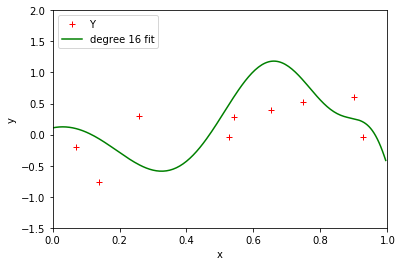

In [253]:
plot_poly_predictions(data,model_ridge_16)

## Perform a ridge fit of a degree-16 polynomial using a very large penalty strength

In [255]:
model_ridge_16_high = polynomial_ridge_regression(data, 16,y, l2_penalty=100)
print_coefficients(model_ridge_16_high)

Learned polynomial for degree 17:
          16           15           14            13           12
0.001614 x  - 0.01645 x  - 0.04149 x  - 0.008912 x  - 0.02349 x 
            11             10           9           8           7
 - 0.02795 x  + 0.0004009 x  - 0.04239 x + 0.01564 x - 0.04691 x
            6           5           4           3           2
 + 0.02275 x - 0.04312 x + 0.02538 x - 0.03118 x + 0.02511 x + 0.2378 x - 0.001067


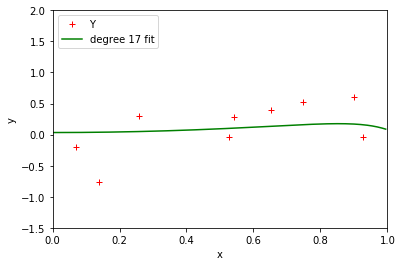

In [256]:
plot_poly_predictions(data,model_ridge_16_high)

## Let's look at fits for a sequence of increasing lambda values

C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.812427e-17
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.810028e-17
  overwrite_a=True).T


lambda = 1e-25
Learned polynomial for degree 17:
          15           14            13             12             11
2.26e-08 x  + 1.1e-07 x  + 7.81e-08 x  - 3.675e-07 x  - 5.257e-07 x 
              10             9             8             7
 + 4.306e-07 x  + 9.238e-07 x - 1.921e-07 x - 7.387e-07 x
              6             5             4             3             2
 + 9.655e-09 x + 2.826e-07 x + 1.138e-08 x - 4.412e-08 x - 2.142e-09 x + 1 x + 1.586e-09


lambda = 1e-10
Learned polynomial for degree 17:
            16             15            14             13
-2.207e-08 x  - 1.314e-07 x  - 1.92e-07 x  + 2.796e-07 x 
              12            11             10             9
 + 9.017e-07 x  + 1.21e-07 x  - 1.364e-06 x  - 7.635e-07 x
              8            7             6             5             4
 + 9.397e-07 x + 7.49e-07 x - 2.987e-07 x - 2.998e-07 x + 3.531e-08 x
              3             2
 + 4.684e-08 x + 1.756e-10 x + 1 x - 1.64e-09


lambda = 1e-06
Learned polyn

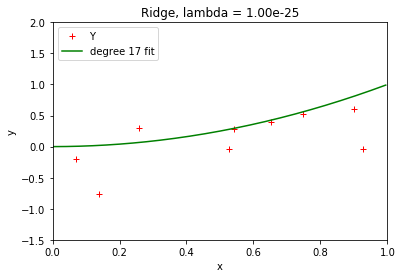

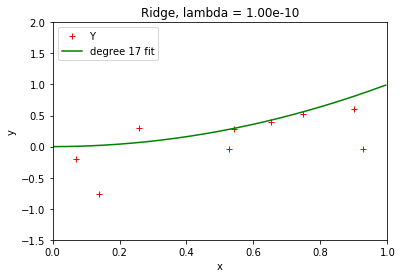

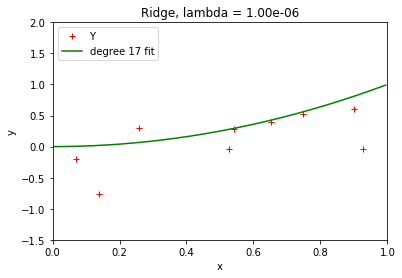

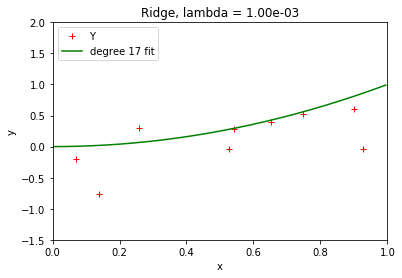

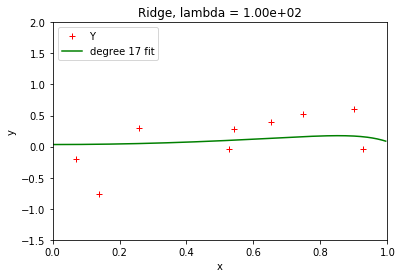

In [257]:
for l2_penalty in [1e-25, 1e-10, 1e-6, 1e-3, 1e2]:
    model = polynomial_ridge_regression(data, 16 ,y , l2_penalty)
    print ('lambda =', l2_penalty)
    print_coefficients(model)
    print ('\n')
    plt.figure()
    plot_poly_predictions(data,model)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)

In [336]:
data

,X1,Y
0,-1.130275,3.050759
1,0.927091,-0.044144
2,-0.995112,1.015759
3,-0.465192,-0.444713
4,-0.103826,0.039178
5,0.528128,-0.038238
6,-0.517361,-1.738675
7,-0.240181,-2.075279
8,-0.548826,-0.712749
9,-1.058497,0.161015


## Perform a ridge fit of a degree-16 polynomial using a "good" penalty strength

We will learn about cross validation later in this course as a way to select a good value of the tuning parameter (penalty strength) lambda.  Here, we consider "leave one out" (LOO) cross validation, which one can show approximates average mean square error (MSE).  As a result, choosing lambda to minimize the LOO error is equivalent to choosing lambda to minimize an approximation to average MSE.

In [321]:
(range(10))

range(0, 10)

In [325]:
from sklearn.model_selection import KFold
fd = KFold(2,True)


In [353]:
da = polynomial_features(data, 8)
da

,X1,Y,X2,X3,X4,X5,X6,X7,X8
0,-1.130275,3.050759,1.277521,-1.443950,1.632060,-1.844677e+00,2.084992e+00,-2.356614e+00,2.663621e+00
1,0.927091,-0.044144,0.859499,0.796834,0.738738,6.848774e-01,6.349440e-01,5.886512e-01,5.457335e-01
2,-0.995112,1.015759,0.990249,-0.985409,0.980592,-9.757994e-01,9.710300e-01,-9.662840e-01,9.615611e-01
3,-0.465192,-0.444713,0.216404,-0.100669,0.046831,-2.178525e-02,1.013433e-02,-4.714413e-03,2.193109e-03
4,-0.103826,0.039178,0.010780,-0.001119,0.000116,-1.206493e-05,1.252650e-06,-1.300573e-07,1.350330e-08
5,0.528128,-0.038238,0.278920,0.147305,0.077796,4.108638e-02,2.169889e-02,1.145980e-02,6.052247e-03
6,-0.517361,-1.738675,0.267663,-0.138478,0.071643,-3.706546e-02,1.917623e-02,-9.921040e-03,5.132762e-03
7,-0.240181,-2.075279,0.057687,-0.013855,0.003328,-7.992649e-04,1.919680e-04,-4.610702e-05,1.107402e-05
8,-0.548826,-0.712749,0.301210,-0.165312,0.090728,-4.979377e-02,2.732814e-02,-1.499840e-02,8.231520e-03
9,-1.058497,0.161015,1.120416,-1.185958,1.255333,-1.328766e+00,1.406495e+00,-1.488771e+00,1.575860e+00


In [354]:
# above not responding so create on own
def kfolds(data, k ):
    train = []
    valid = []
    n = len(data)
    for i in range(n):
        start = int((n*i)/k)
        end = int((n*(i+1))/k)
        val = data[start:end]
        tra = data[0:start].append(data[end:])
        train.append(tra)
        valid.append(val)
    return train ,valid
train ,valid = kfolds(da,3)
len(train[0]),len(valid[1])
train[0]

,X1,Y,X2,X3,X4,X5,X6,X7,X8
10,1.040959,-1.192588,1.083595,1.127978,1.174178,1.222271e+00,1.272333e+00,1.324446e+00,1.378694e+00
11,1.062186,-1.214589,1.128239,1.198399,1.272923,1.352081e+00,1.436161e+00,1.525470e+00,1.620333e+00
12,-1.452505,1.270150,2.109771,-3.064454,4.451135,-6.465297e+00,9.390878e+00,-1.364030e+01,1.981260e+01
13,-1.219099,0.928719,1.486202,-1.811827,2.208797,-2.692742e+00,3.282718e+00,-4.001958e+00,4.878783e+00
14,0.256900,0.292563,0.065997,0.016955,0.004356,1.118968e-03,2.874625e-04,7.384901e-05,1.897179e-05
15,0.652387,0.397325,0.425609,0.277662,0.181143,1.181755e-01,7.709617e-02,5.029656e-02,3.281283e-02
16,0.071409,-0.202786,0.005099,0.000364,0.000026,1.856770e-06,1.325897e-07,9.468071e-09,6.761034e-10
17,-1.275722,2.329165,1.627466,-2.076194,2.648645,-3.378935e+00,4.310580e+00,-5.499101e+00,7.015323e+00
18,0.900076,0.601183,0.810138,0.729186,0.656323,5.907408e-01,5.317118e-01,4.785813e-01,4.307597e-01
19,-0.034403,0.127894,0.001184,-0.000041,0.000001,-4.819171e-08,1.657932e-09,-5.703760e-11,1.962256e-12


In [355]:
tr = kfolds(da,3)
len(tr)


2

In [356]:
def split_data(train):
    train_y = train['Y']
    #print(train_y)
    train_x = train.drop('Y',axis =1)
    #print(train_y)
    return train_x,train_y 

In [357]:
x ,y = split_data(da)
print(y)

0     3.050759
1    -0.044144
2     1.015759
3    -0.444713
4     0.039178
5    -0.038238
6    -1.738675
7    -2.075279
8    -0.712749
9     0.161015
10   -1.192588
11   -1.214589
12    1.270150
13    0.928719
14    0.292563
15    0.397325
16   -0.202786
17    2.329165
18    0.601183
19    0.127894
20    0.527797
21    2.812519
22    0.286043
23   -0.759335
24   -0.800124
25    0.134200
26   -0.564404
27    0.556506
28    0.921336
29    0.450548
Name: Y, dtype: float64


In [414]:
# LOO cross validation -- return the average MSE
def loo(data, deg,  l2_penalty_values):
    
    # Create polynomial features
    data = polynomial_features(data, deg)
    
    # Create as many folds for cross validatation as number of data points
    num_folds = int(len(data)/10)
    train, valid = kfolds(data,num_folds)
    
    # for each value of l2_penalty, fit a model for each fold and compute average MSE
    l2_penalty_mse = []
    min_mse = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mse = 0.0
        for i in range(num_folds):
            train_x ,train_y = split_data(train[i])
            # train model
            model = Ridge(alpha = l2_penalty)
            model.fit(train_x , train_y)
            #print(model.predict(train_x))
            # predict on validation set 
            valid_x ,valid_y = split_data(valid[i])
            y_valid_predicted = model.predict(valid_x)
            #print(y_valid_predicted)
            # compute squared error
            res = (y_valid_predicted - valid_y)
            next_mse += (res**2).sum()
        
        # save squared error in list of MSE for each l2_penalty
        next_mse = next_mse/num_folds
        l2_penalty_mse.append(next_mse)
        if min_mse is None or next_mse > min_mse:
            min_mse = next_mse
            best_l2_penalty = l2_penalty
            
    return l2_penalty_mse,best_l2_penalty

Run LOO cross validation for "num" values of lambda, on a log scale

In [415]:
l2_penalty_values = np.logspace(-4, 10, num=10)
l2_penalty_mse,best_l2_penalty = loo(data, 16, l2_penalty_values)

In [416]:
print(l2_penalty_mse,best_l2_penalty)

[4616979.715966418, 3440.866070137877, 172997.23837732928, 3206.2772026444186, 56602.870182479586, 124.6480421452349, 434.61656274793796, 16.141683887968828, 13.867692683746776, 13.773907927488217] 0.0001


Plot results of estimating LOO for each value of lambda

l2_penalty_values [1.00000000e-04 3.59381366e-03 1.29154967e-01 4.64158883e+00
 1.66810054e+02 5.99484250e+03 2.15443469e+05 7.74263683e+06
 2.78255940e+08 1.00000000e+10]


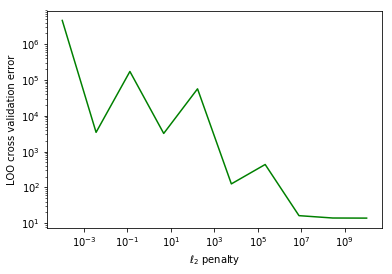

In [417]:
print('l2_penalty_values', l2_penalty_values)
plt.plot(l2_penalty_values,l2_penalty_mse,'g-')
plt.xlabel('$\ell_2$ penalty')
plt.ylabel('LOO cross validation error')
plt.xscale('log')
plt.yscale('log')

Find the value of lambda, $\lambda_{\mathrm{CV}}$, that minimizes the LOO cross validation error, and plot resulting fit

In [418]:
best_l2_penalty

0.0001

In [419]:
model = polynomial_ridge_regression(data, 16, y, l2_penalty=best_l2_penalty)
print_coefficients(model)

Learned polynomial for degree 17:
           16            15             14             13
1.343e-05 x  + 4.45e-05 x  - 1.249e-05 x  - 0.0001349 x 
              12             11            10            9
 - 5.361e-06 x  + 0.0001499 x  - 1.76e-05 x  - 8.48e-07 x
              8             7            6             5             4
 + 6.934e-05 x - 0.0001264 x - 0.000105 x + 4.218e-05 x + 7.557e-05 x
              3             2
 + 1.318e-05 x - 1.674e-05 x + 1 x + 6.902e-06


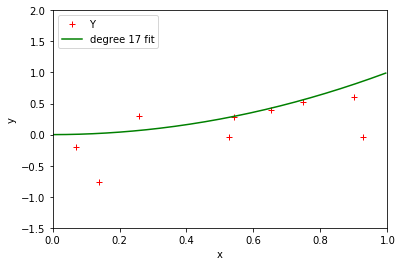

In [420]:
plot_poly_predictions(data,model)

# 

# 

# 

# 

# Lasso Regression

Lasso regression jointly shrinks coefficients to avoid overfitting, and implicitly performs feature selection by setting some coefficients exactly to 0 for sufficiently large penalty strength lambda (here called "L1_penalty").  In particular, lasso takes the RSS term of standard least squares and adds a 1-norm cost of the coefficients $\|w\|$.

Define our function to solve the lasso objective for a polynomial regression model of any degree:

In [457]:
def polynomial_lasso_regression(data, deg,y, l1_penalty):
    x = polynomial_features(data,deg)
    model = Lasso(alpha = l1_penalty,max_iter = 1000, tol = 1e-5 ,normalize = True ,selection = 'random')
    model.fit(x,y )
    return model

In [460]:
model_tt = polynomial_lasso_regression(x, 8,y,100)
pred_yy = model_tt.predict(x)
print(model_tt )

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='random', tol=1e-05, warm_start=False)


## Explore the lasso solution as a function of a few different penalty strengths

We refer to lambda in the lasso case below as "l1_penalty"

C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


l1_penalty =  0.0001
number of nonzeros = 16
Learned polynomial for degree 16:
           15           14             13             12     10
0.0003206 x  - 0.00062 x  + 0.0006583 x  - 0.0008014 x  - 0 x 
             9           8           7          6          5
 - 0.003957 x + 0.00274 x - 0.05778 x + 0.0539 x - 0.3664 x
            4          3         2
 - 0.06846 x - 0.8439 x - 3.079 x + 1.796 x + 2.391


l1_penalty =  0.01
number of nonzeros = 16
Learned polynomial for degree 16:
            11            9     7     5     3          2
-3.934e-05 x  - 0.007196 x - 0 x - 0 x - 0 x - 0.2879 x + 0.3385 x - 0


l1_penalty =  0.1
number of nonzeros = 16
Learned polynomial for degree 16:
 
0


l1_penalty =  10
number of nonzeros = 16
Learned polynomial for degree 16:
 
0




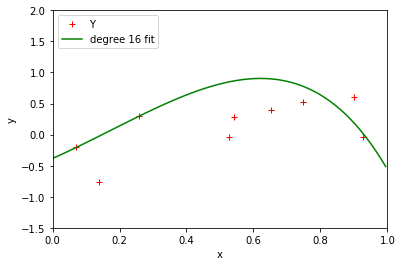

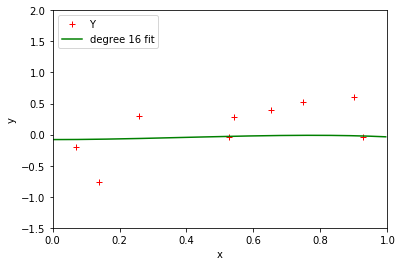

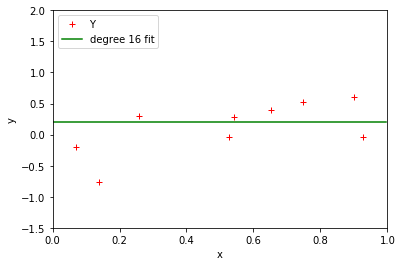

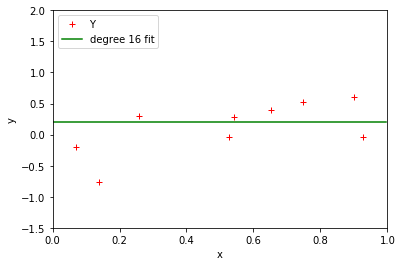

In [468]:
for l1_penalty in [0.0001, 0.01, 0.1, 10]:
    model = polynomial_lasso_regression(x, 16,y ,l1_penalty)
    print ('l1_penalty = ',  l1_penalty )
    print ('number of nonzeros = %d' % len(model.coef_) ) # get non zeros change it
    print_coefficients(model)
    print ('\n')
    plt.figure()
    plot_poly_predictions(data,model)
    #plt.title('LASSO ', lambda =  # nonzeros = ',  (l1_penalty, (model.coefficients['value']).nnz())

Above: We see that as lambda increases, we get sparser and sparser solutions.  However, even for our non-sparse case for lambda=0.0001, the fit of our high-order polynomial is not too wild.  This is because, like in ridge, coefficients included in the lasso solution are shrunk relative to those of the least squares (unregularized) solution.  This leads to better behavior even without sparsity.  Of course, as lambda goes to 0, the amount of this shrinkage decreases and the lasso solution approaches the (wild) least squares solution.